In [2]:
import sys
print(sys.version)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [ ]:
"""
Created on Jun 17 2020
@author: Neven Caplar
@contact: ncaplar@princeton.edu

1. Name and place the data in DATA_FOLDER. For example, on my system I have them at 
   /Users/nevencaplar/Documents/PFS/ReducedData/
2. (OPTIONAL)Next cell contains some extensions that I use that make life much easier when using jupyter notebook 
    Without them this notebook becomes reallllly huge and hard to deal with
    These can be downloaded from https://github.com/ipython-contrib/jupyter_contrib_nbextensions

"""

In [10]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [11]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
DATA_FOLDER='/Users/nevencaplar/Documents/PFS/ReducedData/'

In [42]:
import numpy as np

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

# Init 

In [71]:
# Extract data from /tigress/ncaplar/Data/Data_for_Brent_June_2020

# Specify dataset and arc

# dataset is one of [1,2,3,4,5]
# dataset = 0; not avaliable
# dataset = 1;  F/3.2 stop, February 2019 data
# dataset = 2;  F/2.8 stop, May 2019 data
# dataset = 3; F/2.5 stop, June 2019 data
# dataset =4,5; F=2.8 stop, taken in July 2019, reduced in August

# arc can be HgAr, Ne or Kr for dataset [2,4,5]
# arc can be HgAr or Ne for dataset [1,3]

# specify defocus
# one of the followign values
# defocus=['-4.0','-3.5','-3.0','-2.5','-2','-1.5','-1','-0.5','0','0.5','1','1.5','2','2.5','3.0','3.5','4']

arc='HgAr'
dataset=2
defocus_value='-3.0'

In [72]:

if dataset==1:
    STAMPS_FOLDER=DATA_FOLDER+"Data_Feb_5/Stamps_cleaned/"    
if dataset==2:
    STAMPS_FOLDER=DATA_FOLDER+"Data_May_28/Stamps_cleaned/"
if dataset==3:
    STAMPS_FOLDER=DATA_FOLDER+"Data_Jun_25/Stamps_cleaned/"
if dataset==4 or dataset==5:
    STAMPS_FOLDER=DATA_FOLDER+"Data_Aug_14/Stamps_cleaned/"    

    
defocus=['-4.0','-3.5','-3.0','-2.5','-2','-1.5','-1','-0.5','0','0.5','1','1.5','2','2.5','3.0','3.5','4']


if dataset==1:  
    # F/3.2 stop 
    if arc is not None:         
        if arc=="HgAr":
            single_number_focus=11748
            final_Arc=np.load(DATA_FOLDER+'Data_Feb_5/Dataframes/finalHgAr_Feb2019.pkl',allow_pickle=True)
        elif arc=="Ne":
            single_number_focus=11748+607  
            final_Arc=np.load(DATA_FOLDER+'Data_Feb_5/Dataframes/finalNe_Feb2019.pkl',allow_pickle=True)

if dataset==2:
    # F/2.8 stop
    if arc is not None:         
        if arc=="HgAr":
            single_number_focus=17017+54
            final_Arc=np.load(DATA_FOLDER+'Data_May_28/Dataframes/finalHgAr_Feb2020',allow_pickle=True)
        if arc=="Ne":
            single_number_focus=16292  
            final_Arc=np.load(DATA_FOLDER+'Data_May_28/Dataframes/finalNe_Feb2020',allow_pickle=True)    
        if arc=="Kr":
            single_number_focus=17310+54  
            final_Arc=np.load(DATA_FOLDER+'Data_May_28/Dataframes/finalKr_Feb2020',allow_pickle=True)
            
if dataset==3:  
    # F/2.5 stop
    if arc is not None:         
        if arc=="HgAr":
            single_number_focus=19238+54
            final_Arc=np.load(DATA_FOLDER+'Data_May_28/Dataframes/finalHgAr_May2019.pkl',allow_pickle=True)
        elif arc=="Ne":
            single_number_focus=19472  
            final_Arc=np.load(DATA_FOLDER+'Data_May_28/Dataframes/finalNe_May2019.pkl',allow_pickle=True)

if dataset==4 or dataset==5:  
    # F/2.8 stop
    if arc is not None:         
        if arc=="HgAr":
            single_number_focus=21346+54
            final_Arc=np.load(DATA_FOLDER+'Data_Aug_14/Dataframes/finalHgAr_Feb2020',allow_pickle=True)
        if arc=="Ne":
            single_number_focus=21550+54  
            final_Arc=np.load(DATA_FOLDER+'Data_Aug_14/Dataframes/finalNe_Feb2020',allow_pickle=True)
        if str(arc)=="Kr":
            single_number_focus=21754+54   
            final_Arc=np.load(DATA_FOLDER+'Data_Aug_14/Dataframes/finalKr_Feb2020',allow_pickle=True)
            
            
defocus_modification=(defocus.index(defocus_value)-9)*6
obs=single_number_focus+defocus_modification

# Show data 

In [73]:
# which spot do you wish to look at
single_number=48

In [74]:
# information about the spot
final_Arc.loc[single_number]

fiber                  339
xc                    1610
yc                     772
wavelength        690.9346
close                    0
lamp                  HgAr
xc_effective          1610
second_offset       -19.25
second_ratio        0.0034
second2_offset       -40.7
second2_ratio        0.006
Name: 48, dtype: object

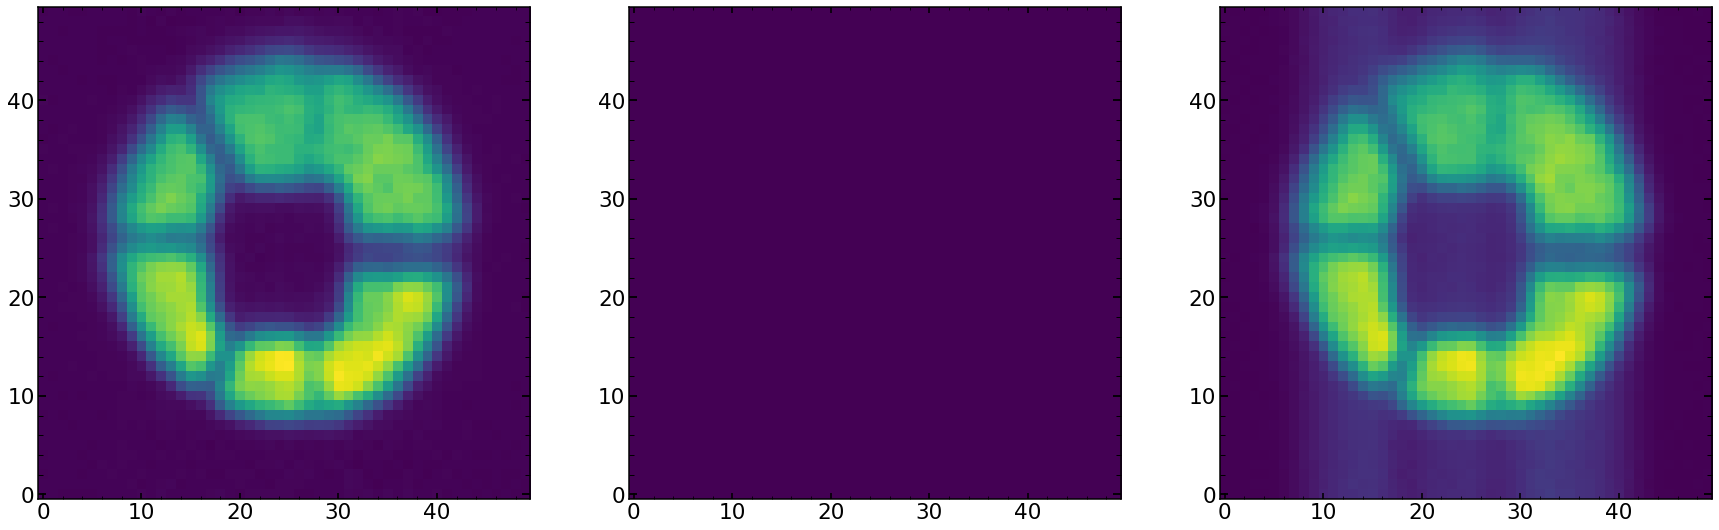

In [75]:
# load and show the stamps
sci_image =np.load(STAMPS_FOLDER+'sci'+str(obs)+str(single_number)+str(arc)+'_Stacked.npy')
mask_image =np.load(STAMPS_FOLDER+'mask'+str(obs)+str(single_number)+str(arc)+'_Stacked.npy')
var_image =np.load(STAMPS_FOLDER+'var'+str(obs)+str(single_number)+str(arc)+'_Stacked.npy')

plt.figure(figsize=(30,10))

plt.subplot(131)
plt.imshow(sci_image)

plt.subplot(132)
plt.imshow(mask_image)

plt.subplot(133)
plt.imshow(var_image)
